In [13]:
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
current_palette = sns.color_palette('bright',10)

In [7]:
# ground_truth_path = "../data/shapenetcore_partanno_segmentation_benchmark_v0_normal/"
# class_id = "03797390"
# object_id = 1

ground_truth_path = "../data/save_test_shapeseg/"
class_id = "Knife"
object_id = "_9"

In [8]:
all_files = os.listdir(os.path.join(ground_truth_path, class_id+"/"))
selected_file = os.path.join(ground_truth_path, class_id+"/"+ class_id+object_id+".txt")

In [9]:
lines = open(selected_file, "r").read().split('\n')[:-1]
ground_truth = [[float(x) for x in i.split(" ")] for i in lines]
ground_truth = np.stack(ground_truth)

In [10]:
ground_truth_part_label = []
for line in ground_truth:
    if line[6] not in ground_truth_part_label:
        ground_truth_part_label.append(line[6])
ground_truth_part_label.sort()

In [11]:
len(ground_truth)

2048

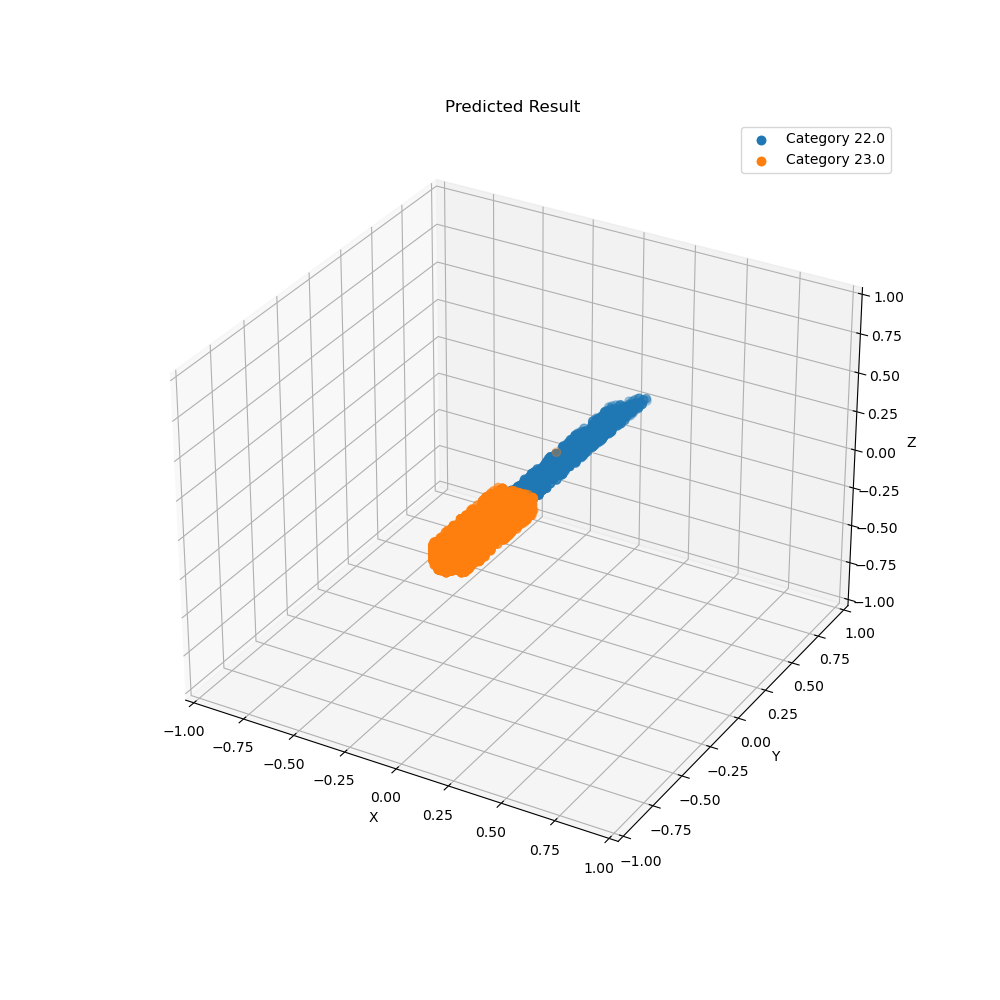

In [14]:
%matplotlib widget

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

for label in ground_truth_part_label:
    pt = np.where(ground_truth[:,6] == label)
    color = current_palette.as_hex()[ground_truth_part_label.index(label)]
    ax.scatter(ground_truth[pt, 0], ground_truth[pt, 1], ground_truth[pt, 2],marker='.', s=150, label='Category '+ str(label))
    
    
ax.set_title('Predicted Result')
ax.legend()
plt.show()

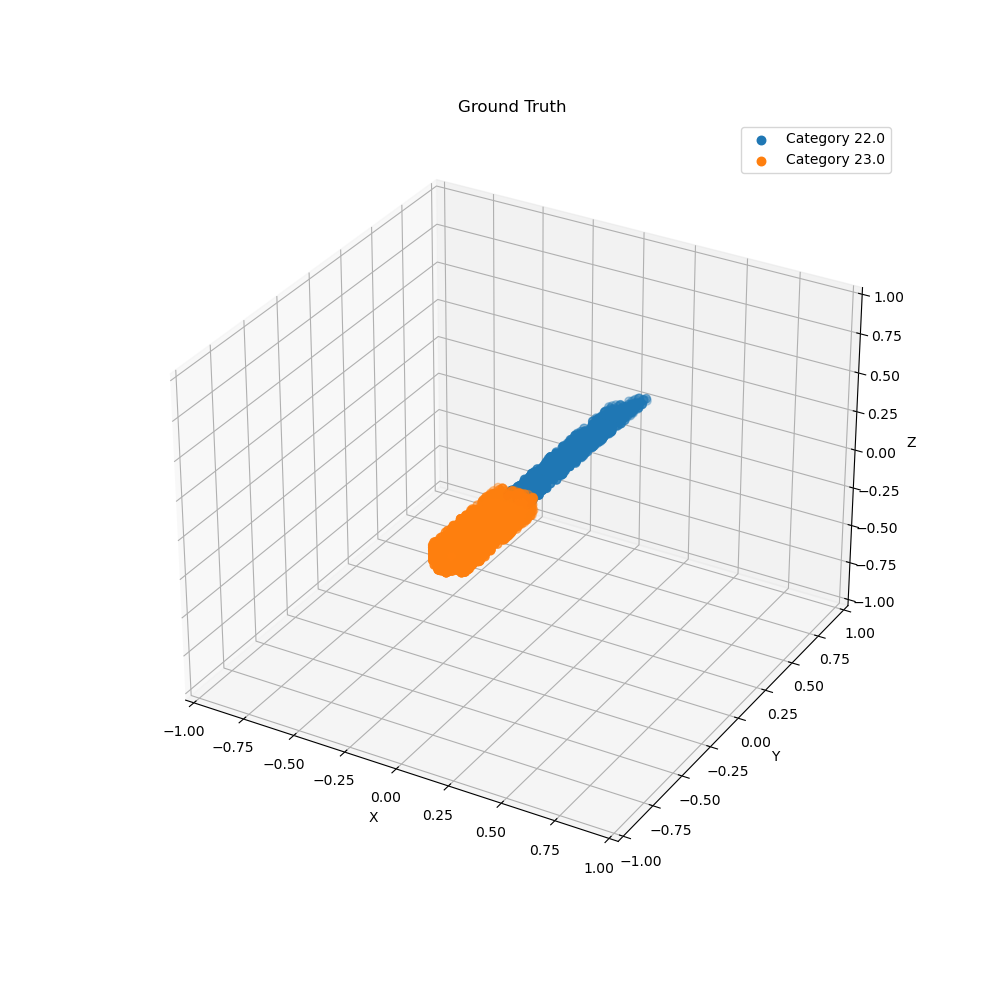

In [ ]:
%matplotlib widget

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

for label in ground_truth_part_label:
    pt = np.where(ground_truth[:,7] == label)
    color = current_palette.as_hex()[ground_truth_part_label.index(label)]
    ax.scatter(ground_truth[pt, 0], ground_truth[pt, 1], ground_truth[pt, 2],marker='.', s=150, label='Category '+ str(label))
    
    
ax.set_title('Ground Truth')
ax.legend()
plt.show()